# Angle Dependent Reflection Filter

### Normal Incidence Reflection Filter Coefficients

In [9]:
import numpy as np
import scipy.signal
import scipy.io
import scipy.interpolate
import matplotlib.pyplot as plt
import math

Different asphalt mixtures have different absorption charateristics. In the literature, many studies provide values for the absorption coefficients at different frequencies for multiple asphalt mixtures. The coefficients are computed experimentally using Impedance Tubes, that allow to compute normal incidence absorption coefficients in the frequency range from 0 Hz to 2000 Hz. The mixtures that we have analysed are provided in
> Ranzo et al., Absorption coefficients of asphalt materials, *2nd Eurasphalt & Eurobitume Congress*, 2000

In order to simulate sources emitting at higher frequencies, we need to extrapolate data from the available frequency range. To this end, we considered that at high frequency the absorption tends to zero, due to the higher impedance mismatch between air and any hard material at high frequency. Therefore, we added a zero in the absorption coefficients at f = 8 kHz, and computed a polynomial interpolation of order 2 to evaluate the absorption coefficients throughout all the frequency spectrum

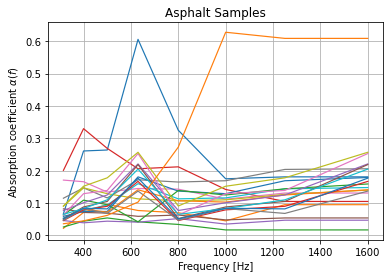

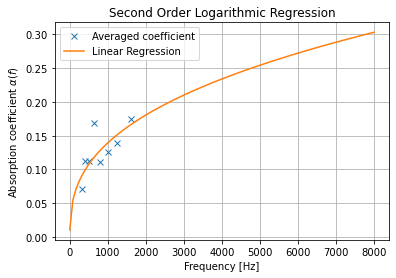

[0.0715     0.11186364 0.11222727 0.16927273 0.11054545 0.12513636
 0.13859091 0.17490909]


In [10]:
f = np.array([315, 400, 500, 630, 800, 1000, 1250, 1600])
m1 = np.array([0.067, 0.261, 0.264, 0.606, 0.325, 0.175, 0.181, 0.181])
m2 = np.array([0.022, 0.071, 0.096, 0.077, 0.070, 0.045, 0.095, 0.095])
m3 = np.array([0.026, 0.044, 0.054, 0.042, 0.034, 0.017, 0.017, 0.017])
m4 = np.array([0.201, 0.330, 0.269, 0.206, 0.212, 0.142, 0.105, 0.105])

p1 = np.array([0.046, 0.039, 0.044, 0.041, 0.052, 0.035, 0.047, 0.047])
p2 = np.array([0.036, 0.045, 0.062, 0.103, 0.273, 0.628, 0.609, 0.609])
p3 = np.array([0.082, 0.071, 0.069, 0.059, 0.063, 0.048, 0.054, 0.054])
p4 = np.array([0.171, 0.166, 0.134, 0.145, 0.143, 0.112, 0.131, 0.131])

tino1 = np.array([0.115, 0.147, 0.116, 0.172, 0.165, 0.169, 0.204, 0.206])
tino2 = np.array([0.09, 0.147, 0.129, 0.113, 0.107, 0.110, 0.127, 0.140])

anas5old1 = np.array([0.054, 0.077, 0.094, 0.16, 0.113, 0.116, 0.144, 0.148])
anas5p1 = np.array([0.047, 0.064, 0.043, 0.116, 0.091, 0.082, 0.100, 0.107])
anas15 = np.array([0.052, 0.062, 0.056, 0.111, 0.093, 0.100, 0.134, 0.140])
anas0old2 = np.array([0.059, 0.074, 0.074, 0.181, 0.137, 0.129, 0.169, 0.179])
anas0p2 = np.array([0.049, 0.081, 0.072, 0.141, 0.107, 0.103, 0.125, 0.141])
anas10 = np.array([0.063, 0.109, 0.095, 0.042, 0.139, 0.125, 0.144, 0.159])
iso103p = np.array([0.046, 0.079, 0.090, 0.167, 0.046, 0.079, 0.090, 0.167])
iso103 = np.array([0.077, 0.101, 0.125, 0.221, 0.077, 0.101, 0.125, 0.221])
isoAE4p = np.array([0.052, 0.088, 0.105, 0.219, 0.052, 0.088, 0.105, 0.219])
isoAE4 = np.array([0.063, 0.129, 0.139, 0.253, 0.063, 0.129, 0.139, 0.253])
disc5 = np.array([0.047, 0.083, 0.068, 0.137, 0.047, 0.083, 0.068, 0.137])
cont6les = np.array([0.091, 0.152, 0.178, 0.257, 0.091, 0.152, 0.178, 0.257])
cont6 = np.array([0.065, 0.083, 0.110, 0.205, 0.065, 0.083, 0.110, 0.205])
disc7 = np.array([0.051, 0.084, 0.082, 0.177, 0.051, 0.084, 0.082, 0.177])
asphalts2 = np.matrix([m1, m2, m3, m4, p1, p3, p4, tino1, tino2, anas5old1, anas0old2,
    anas0p2, anas10, iso103p, iso103, isoAE4p, isoAE4, disc5, cont6les,
    cont6, disc7, p2])

plt.figure()
plt.plot(f, asphalts2.T, linewidth = 1.2)
plt.title('Asphalt Samples')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Absorption coefficient $\alpha(f)$')
plt.grid()
plt.show()

# asphalts2 = np.c_[asphalts2, 0.3 * np.ones(np.shape(asphalts2)[0])]
# f = np.append(f, 8000)

# Compute average coefficients
alpha_avg = np.asarray(np.sum(asphalts2, axis = 0)).flatten() / np.shape(asphalts2)[0]

log_f = np.log(f)
log_alpha = np.log(alpha_avg)
log_model = np.polyfit(log_f, log_alpha, deg = 1)

interp_freqs = np.linspace(1, 8000, num = 100)
log_interp_coeffs = np.polyval(log_model, np.log(interp_freqs))
interp_coeffs = np.exp(log_interp_coeffs)
interp_coeffs = np.clip(interp_coeffs, 0, 1)

plt.figure()
plt.plot(f, alpha_avg, 'x', linewidth = 1.1)
plt.plot()
plt.plot(interp_freqs, interp_coeffs, linewidth = 1.5)
plt.title('Second Order Logarithmic Regression')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Absorption coefficient $\alpha(f)$')
plt.legend(['Averaged coefficient', 'Linear Regression'])
plt.grid()
plt.show()
print(alpha_avg)

Frequencies:  [   0.    571.43 1142.86 1714.29 2285.71 2857.14 3428.57 4000.  ]
Absorption Coefficients:  [0.   0.11 0.15 0.17 0.19 0.21 0.22 0.23]


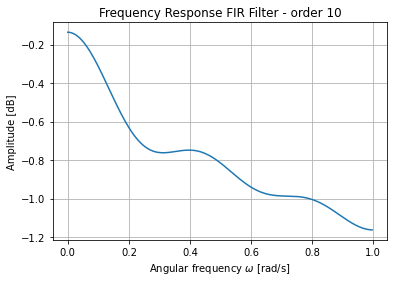

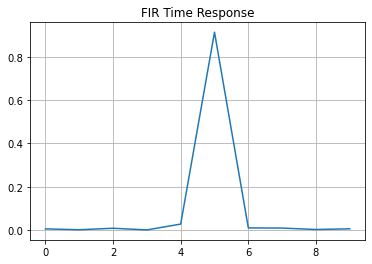

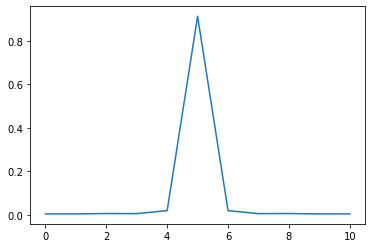

In [11]:
# f = np.array([0, 0.03125, 0.0625, 0.125, 0.25, 0.5, 0.6, 1])
# alpha = np.array([0.02, 0.02, 0.03, 0.03, 0.03, 0.04, 0.04, 0.07])
f_nyq = 4000
f_sel = np.linspace(0,1,8) * f_nyq
f_sel[0] = 0.01

log_alpha_sel = np.polyval(log_model, np.log(f_sel))
alpha_sel = np.clip(np.exp(log_alpha_sel), 0, 1)
f_sel[0] = 0
print('Frequencies: ', np.around(f_sel, 2))
print('Absorption Coefficients: ', np.around(alpha_sel, 2))
    
numtaps = 11
filter_len = 256

refl = np.sqrt(1 - alpha_sel)
b_fir = scipy.signal.firls(numtaps, f_sel / 4000, refl)

w, H_fir = scipy.signal.freqz(b_fir, a=1, worN = filter_len)
H_fir_full = np.concatenate((H_fir, H_fir[-1:0:-1].conj()))

h_fir = np.fft.ifft(H_fir_full).real

plt.figure()
plt.plot(w/np.pi, 20 * np.log10(abs(H_fir)))
plt.title('Frequency Response FIR Filter - order %d' %(numtaps - 1))
plt.xlabel(r"Angular frequency $\omega$ [rad/s]")
plt.ylabel("Amplitude [dB]")
plt.grid()
plt.show()

plt.figure()
plt.plot(np.concatenate((h_fir, np.zeros(512 - len(h_fir))))[0:10])
plt.title('FIR Time Response')
plt.grid()
plt.show()

plt.figure()
plt.plot(b_fir)


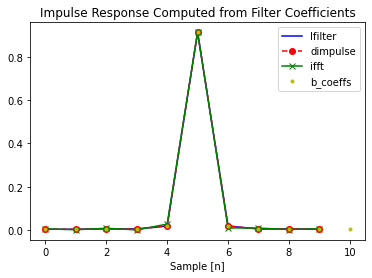

In [12]:
x = np.zeros(100)
x[0] = 1
h_imp1 = scipy.signal.lfilter(b_fir, 1, x)
time, imp_resp1 = scipy.signal.dimpulse((b_fir, np.concatenate((np.array([1.]), np.zeros(len(b_fir)-1))), 1), n=25)

plt.plot(h_imp1[:10], 'b-')
plt.plot(imp_resp1[0][:10], 'r--o')
plt.plot(h_fir[:10], 'g-x')
plt.plot(b_fir, 'y.')
plt.title('Impulse Response Computed from Filter Coefficients')
plt.xlabel('Sample [n]')
plt.legend(['lfilter', 'dimpulse', 'ifft', 'b_coeffs'])
plt.show()


### Angle Dependency

In [13]:
def compute_air_impedance(T, p = 1, c = None):
    ## Computes air impedance given:
    #   T: temperature in Kelvin
    #   p: atmospheric pressure in atm
    #   c: speed of sound in air, at temperature T
    if c == None:
        c = compute_speed_sound(T)
    p = p * 101325          # Convert atm to Pascal
    R_spec = 287.058
    return p / (R_spec * T) * c

def compute_speed_sound(T):
    ## Computes speed of sound in air at temperature T:
    #   T: temperature expressed in Kelvin
    import numpy as np
    return 331.3 * np.sqrt(T / 273.15)

In [14]:
theta_vector = np.arange(-89,89,1)
Z0 = compute_air_impedance(20 + 273.15)
c = compute_speed_sound(20 + 273.15)
Z = - Z0 * (refl + 1) / (refl-1)

b_fir = np.zeros((len(theta_vector), numtaps))
H_fir = np.zeros((len(theta_vector), numtaps), dtype = np.complex_)
R = np.zeros((len(theta_vector), len(refl)))
alpha = np.zeros_like(R)
# Compute filters coefficients for all thetas
for idx, theta in enumerate(theta_vector):
    R[idx] = ((Z * np.cos(math.radians(theta)) - Z0) / (Z * np.cos(math.radians(theta)) + Z0))
    alpha[idx] = 1 - R[idx]**2
    # b_fir = scipy.signal.firls(numtaps, f_sel / 4000, R)      # Exception 'Desired must be positive'
    b_fir[idx] = scipy.signal.firwin2(numtaps, f_sel / 4000, R[idx])
    # time, imp_resp1 = scipy.signal.dimpulse((b_fir[idx], np.concatenate((np.array([1.]), np.zeros(len(b_fir[idx])-1))), 1), n=filter_len)
    # filters[idx] = imp_resp1[0]
    w, H_fir[idx] = scipy.signal.freqz(b_fir[idx], a=1, worN = numtaps)



In [16]:
b_fir[89]

array([2.11913465e-04, 4.74255759e-04, 1.94346413e-03, 3.66518709e-03,
       1.78383025e-02, 9.12592381e-01, 1.78383025e-02, 3.66518709e-03,
       1.94346413e-03, 4.74255759e-04, 2.11913465e-04])

In [23]:
# import imageio
# import os

# filenames = []
# for i in np.arange(0, len(b_fir)):
#     plt.figure()
#     # plt.plot(w / np.pi, 20*np.log10(abs(H_fir[i])), 'b-')
#     plt.plot(20*np.log10(abs(H_fir[i])), 'b-')
#     plt.ylim(-30,-1)
#     plt.title(r'$\Theta$ = %f' %theta_vector[i])
#     filename = f'{i}.png'
#     filenames.append(filename)

#     plt.savefig(filename)
#     plt.close()

# with imageio.get_writer('angle_dep_filters.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)

# for filename in set(filenames):
#     os.remove(filename)

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display


from pathlib import Path
gifPath = Path("angle_dep_filters.gif")


# Display GIF in Jupyter, CoLab, IPython ---- UNCOMMENT LINES BELOW
# with open(gifPath,'rb') as foutput:
#    display.Image(data=foutput.read(), format='png')


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Values of filter coefficient 4')

Text(0.5, 0, '$\\Theta$ [degrees]')

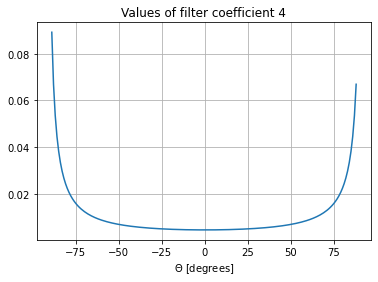

In [25]:
plt.figure()
sel_coeff = 4
plt.plot(theta_vector, b_fir[:,sel_coeff])
plt.title('Values of filter coefficient %d' %sel_coeff)
plt.xlabel(r'$\Theta$ [degrees]')
plt.grid()
plt.show()

Text(0.5, 1.0, '$\\theta$ = -89$^\\circ$')

Text(0.5, 0, '$\\omega$')

Text(0, 0.5, '$\\vert H(\\omega, \\theta) \\vert$')

Text(0.5, 1.0, '$\\theta$ = -64$^\\circ$')

Text(0.5, 0, '$\\omega$')

Text(0, 0.5, '$\\vert H(\\omega, \\theta) \\vert$')

Text(0.5, 1.0, '$\\theta$ = -39$^\\circ$')

Text(0.5, 0, '$\\omega$')

Text(0, 0.5, '$\\vert H(\\omega, \\theta) \\vert$')

Text(0.5, 1.0, '$\\theta$ = -4$^\\circ$')

Text(0.5, 0, '$\\omega$')

Text(0, 0.5, '$\\vert H(\\omega, \\theta) \\vert$')

Text(0.5, 0.98, 'Asphalt Reflection Frequency Response for Different $\\theta$ Values')

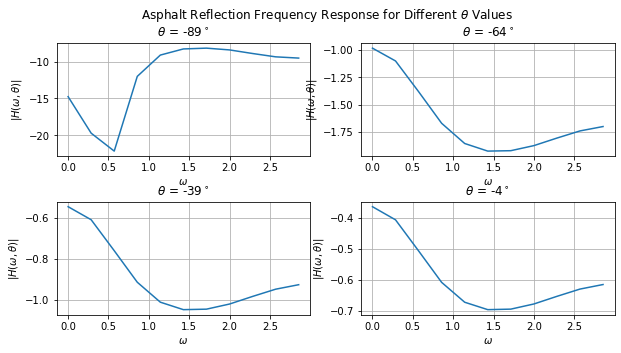

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

fig.subplots_adjust(hspace = 0.4)
axs[0,0].plot(w, 20*np.log10(abs(H_fir[0])))
axs[0,0].set_title(r'$\theta$ = %d$^\circ$' %theta_vector[0])
axs[0,0].grid()
axs[0,0].set_xlabel(r'$\omega$')
axs[0,0].set_ylabel(r'$\vert H(\omega, \theta) \vert$')

axs[0,1].plot(w, 20*np.log10(abs(H_fir[20])))
axs[0,1].set_title(r'$\theta$ = %d$^\circ$' %theta_vector[25])
axs[0,1].grid()
axs[0,1].set_xlabel(r'$\omega$')
axs[0,1].set_ylabel(r'$\vert H(\omega, \theta) \vert$')

axs[1,0].plot(w, 20*np.log10(abs(H_fir[40])))
axs[1,0].set_title(r'$\theta$ = %d$^\circ$' %theta_vector[50])
axs[1,0].grid()
axs[1,0].set_xlabel(r'$\omega$')
axs[1,0].set_ylabel(r'$\vert H(\omega, \theta) \vert$')

axs[1,1].plot(w, 20*np.log10(abs(H_fir[80])))
axs[1,1].set_title(r'$\theta$ = %d$^\circ$' %theta_vector[85])
axs[1,1].grid()
axs[1,1].set_xlabel(r'$\omega$')
axs[1,1].set_ylabel(r'$\vert H(\omega, \theta) \vert$')
fig.suptitle(r'Asphalt Reflection Frequency Response for Different $\theta$ Values')


plt.show()


Text(0.5, 1.0, '$\\vert R \\vert$')

Text(0.5, 0, '$\\theta$ [deg]')

Text(0.5, 1.0, '$\\vert R \\vert^2$')

Text(0.5, 0, '$\\theta$ [deg]')

Text(0.5, 1.0, '$\\alpha$')

Text(0.5, 0, '$\\theta$ [deg]')

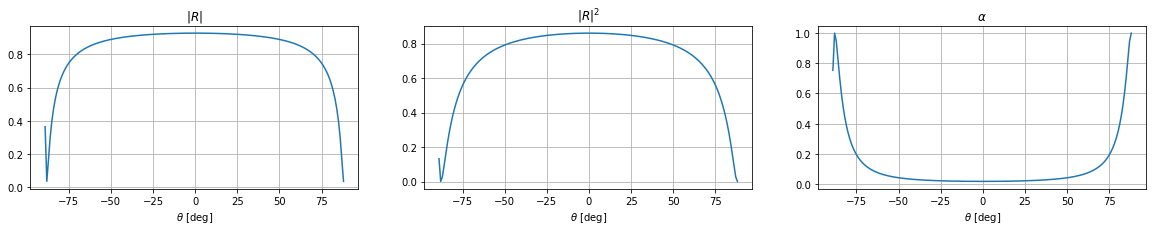

In [27]:
fig, axes = plt.subplots(1,3, figsize = (20,3))
axes[0].plot(theta_vector, np.abs(R[:,5]))
axes[0].set_title(r'$\vert R \vert$')
axes[0].set_xlabel(r'$\theta$ [deg]')
axes[0].grid()

axes[1].plot(theta_vector, R[:,5] ** 2)
axes[1].set_title(r'$\vert R \vert^2$')
axes[1].set_xlabel(r'$\theta$ [deg]')
axes[1].grid()

axes[2].plot(theta_vector, alpha[:,5] ** 2)
axes[2].set_title(r'$\alpha$')
axes[2].set_xlabel(r'$\theta$ [deg]')
axes[2].grid()

plt.show()

In [29]:
b_fir[89]

array([2.04541068e-04, 6.54709799e-04, 1.95861242e-03, 5.61281019e-03,
       4.46539850e-03, 9.33648475e-01, 4.46539850e-03, 5.61281019e-03,
       1.95861242e-03, 6.54709799e-04, 2.04541068e-04])

array([0.03575   , 0.05593182, 0.05611364, 0.08463636, 0.05527273,
       0.06256818, 0.06929545, 0.08745455])

array([0.0715    , 0.11186364, 0.11222727, 0.16927273, 0.11054545,
       0.12513636, 0.13859091, 0.17490909])